# Homework 5: Classifiers

Jake Dame

9 Jul 2024

CS 6017: Data Analytics & Visualization

Dr. Ben Jones

In [1]:
# Set up

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

# for svm; confusion matrix and accuracy score stuff; decision tree stuff
from sklearn import svm, metrics, tree
# MNIST data set
from sklearn.datasets import load_digits
# used to scale the MNIST data
from sklearn.preprocessing import scale
# for cross-validation
from sklearn.model_selection import train_test_split, cross_val_score
# for k-NN
from sklearn.neighbors import KNeighborsClassifier

## Part 1: MNIST Handwritten Digits

### Scaling MNIST Data

"Start by loading the data set and then scaling it using the sklearn.preprocessing.scale method so that the mean entries are 0 and the variances are 1."

In [2]:
# `digits` is a Bunch, an sklearn data type that is similar to a dictionary - has various keys:
# 	+ `data` is 1797 arrays of length 64 corresponding to each pixel value in the 8x8 image
#		+ each value is a 0-255 black/white value (brightness), for grayscale images
# 	+ `images` is the 2D array version of data (1797 2D arrays - each outer array is length 8; each inner array is length 8)
# 	+ `target` is a 1D array containing the known labels for each digit (1797 of them)
# 	+ `target_names` is the names of the distinct digit labels (10 of them)

digits = load_digits()

# scale the data (all the 1D arrays)
scaled_data = scale( digits.data )

### imshow

"Plot a few of the sample images using the imshow method to see what you're working with."

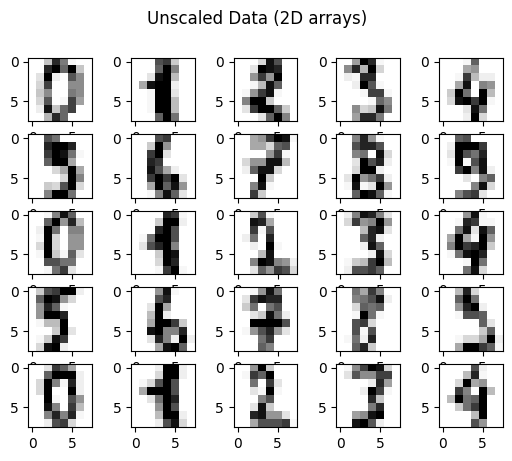

In [3]:
# generate for nums 0-24 --> display first 25 "images" in digits dataset
for i in np.arange( 25 ):
    # draw current image at subplot index ii ( + 1 because of the way subplots are indexed)
    plt.subplot( 5, 5, i + 1 )
    # imshow is a matplotlib function that displays a 2D array as an image
    #   Can work with either brightness or RGB/A values
    #   Here we will give it *an* image from the digits/MNIST dataset
    plt.imshow( digits.images[i], cmap='Greys', interpolation='none' )

plt.suptitle( 'Unscaled Data (2D arrays)' )

plt.show()

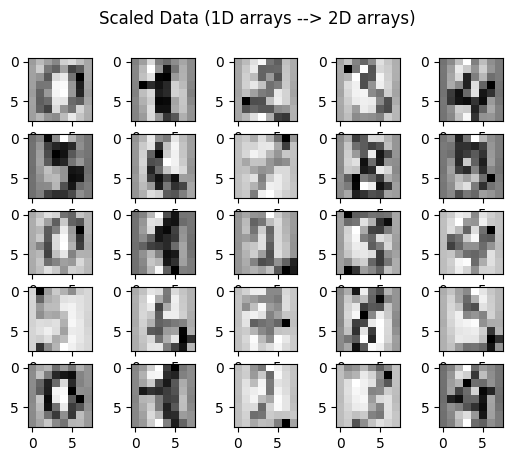

In [4]:
for i in np.arange( 25 ):
    plt.subplot( 5, 5, i + 1 )
    plt.imshow( np.reshape( scaled_data[i, :], (8,8) ), cmap='Greys', interpolation='none' )

plt.suptitle( 'Scaled Data (1D arrays --> 2D arrays)' )

plt.show()

### SVM

"Use SVM with an rbf kernel and parameter C=100 to build a classifier using the training dataset.
Using the test dataset, evaluate the accuracy of the model. Again using the test dataset, compute the confusion matrix."

In [5]:
features = scale( digits.data ) 
labels   = digits.target

# split data in half for cross-validation
training_xs, testing_xs, training_ys, testing_ys = train_test_split( features, labels, random_state=1, test_size=0.5 )

# generate classifier
svc = svm.SVC( kernel='rbf', C=100 )

# fit a model to the training set
svc.fit( training_xs, training_ys )

# use model to generate predictions for the training x's
testing_ys_preds = svc.predict(testing_xs)

# compare the model's predictions with the known y's
accuracy_score   = metrics.accuracy_score(   y_true=testing_ys, y_pred=testing_ys_preds )
confusion_matrix = metrics.confusion_matrix( y_true=testing_ys, y_pred=testing_ys_preds ) 

print( 'Accuracy Score: ', accuracy_score )
print( '\n Confusion Matrix: ', confusion_matrix )

Accuracy Score:  0.978865406006674

 Confusion Matrix:  [[ 83   0   0   0   0   0   0   0   0   0]
 [  0  92   0   0   1   0   0   0   0   0]
 [  0   0  82   0   2   0   0   1   0   0]
 [  0   0   1  95   1   0   0   0   1   0]
 [  0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0   0  80   1   0   0   0]
 [  0   0   0   0   0   0  88   0   0   0]
 [  0   0   0   0   0   0   0  88   0   1]
 [  0   0   0   1   1   0   0   0  78   1]
 [  0   0   0   2   0   2   1   0   2  94]]


**"What is the most common mistake that the classifier makes?"**

	Classifying '9'.

	The bottom-most row (the 10th class, representing the digit '9') has the most predictions of numbers other than the true outcome (the 10th "column", or the "cell" corresponding to the diagonal for that row).

"Plot all of these misclassified digits as images."

In [6]:
# # TODO

# for i in testing_xs:

#     predicted_im = testing_xs[i]
#     actual_im    = testing_ys[i]

#     if predicted_im != actual_im:
#         plt.subplot( 5, 5, i + 1 )
#         # as done in an earlier example, need to turn the 1D array into 2D using .reshape()
#         plt.imshow( np.reshape( predicted_im, (8, 8) ), cmap='Greys', interpolation='none' )
#         plt.title(f'Predicted: {predicted_im}, Actual: {actual_im}')

# plt.title('Misclassified Images From MNIST Using SVM (rbf, C=100) ')

# plt.show()

"Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value?"

In [7]:
max_score = 0
best_c = 1

# test the svm model using different c's
for c in range(1, 502, 5):

	loop_svc = svm.SVC( kernel='rbf', C=c )

	loop_svc.fit( training_xs, training_ys )

	scores = cross_val_score( estimator=loop_svc, X=training_xs, y=training_ys, cv=10, scoring='accuracy' ) 

	# the average of the scores is used to compare
	avg_score = np.mean(scores)

	# update c if necessary
	if avg_score > max_score:
		max_score = avg_score
		best_c = c

print( 'Best c value: ', best_c)

Best c value:  6


### Train-Test on Non-Scaled Data

In [8]:
features = digits.data # unscaled data
labels   = digits.target

# split data in half for cross-validation
training_xs, testing_xs, training_ys, testing_ys = train_test_split( features, labels, random_state=1, test_size=0.5 )

# generate classifier
svc = svm.SVC( kernel='rbf', C=100 )

# fit a model to the training set
svc.fit( training_xs, training_ys )

# use model to generate predictions for the training x's
testing_ys_preds = svc.predict(testing_xs)

# compare the model's predictions with the known y's
accuracy_score   = metrics.accuracy_score(   y_true=testing_ys, y_pred=testing_ys_preds )
confusion_matrix = metrics.confusion_matrix( y_true=testing_ys, y_pred=testing_ys_preds ) 

print( 'Accuracy Score: ', accuracy_score )
print( '\n Confusion Matrix: ', confusion_matrix )

Accuracy Score:  0.9877641824249166

 Confusion Matrix:  [[ 83   0   0   0   0   0   0   0   0   0]
 [  0  92   0   0   0   0   0   0   1   0]
 [  0   0  85   0   0   0   0   0   0   0]
 [  0   0   1  96   0   0   0   1   0   0]
 [  0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0   0  79   1   0   0   1]
 [  0   1   0   0   0   0  87   0   0   0]
 [  0   0   0   0   0   0   0  88   0   1]
 [  0   0   0   0   0   0   0   0  81   0]
 [  0   0   0   0   0   2   0   0   2  97]]


### $k$-NN

"Repeat the same experiments as you did with the SVM. Start with a k of 10 for the first experiment and then try to find a good value of k using cross_val_score"

In [9]:
features = scale( digits.data )
labels   = digits.target

# split data in half for cross-validation
training_xs, testing_xs, training_ys, testing_ys = train_test_split( features, labels, random_state=1, test_size=0.5 )

# generate classifier, start with 10 neighbors
knn_classifier = KNeighborsClassifier( n_neighbors=10 )

# fit a model to the training set
knn_classifier.fit( training_xs, training_ys )

# use model to generate predictions for the training x's
testing_ys_preds = knn_classifier.predict( testing_xs )

# compare the model's predictions with the known y's
accuracy_score   = metrics.accuracy_score(   y_true=testing_ys, y_pred=testing_ys_preds )
confusion_matrix = metrics.confusion_matrix( y_true=testing_ys, y_pred=testing_ys_preds ) 

print( 'Accuracy Score: ', accuracy_score )
print( '\n Confusion Matrix: ', confusion_matrix )

# find a good k
max_score = 0
best_k = 1

# test the svm model using different c's
for k in range(1, 102):

	loop_knn = KNeighborsClassifier( n_neighbors=k )

	loop_knn.fit( training_xs, training_ys )

	scores = cross_val_score( estimator=loop_knn, X=training_xs, y=training_ys, cv=10, scoring='accuracy' ) 

	# the average of the scores is used to compare
	avg_score = np.mean(scores)

	# update k if necessary
	if avg_score > max_score:
		max_score = avg_score
		best_k = k

print( 'Best k value: ', best_k)

Accuracy Score:  0.9510567296996663

 Confusion Matrix:  [[83  0  0  0  0  0  0  0  0  0]
 [ 0 83  9  0  0  1  0  0  0  0]
 [ 0  0 82  0  0  0  0  1  2  0]
 [ 0  0  1 93  0  0  0  2  1  1]
 [ 0  1  0  0 97  0  0  2  0  0]
 [ 0  1  0  1  1 77  1  0  0  0]
 [ 0  0  0  0  0  0 88  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  4  1  1  0  1  0  0 74  0]
 [ 0  1  0  3  0  3  1  1  2 90]]
Best k value:  5


## Part 2: Online News Dataset

### Import the Data

In [10]:
# "Use the pandas.read_csv() function to import the dataset."

df = pd.read_csv("OnlineNewsPopularity.csv")

# "To use scikit-learn, we'll need to save the data as a numpy array. 
# Use the DataFrame.values() method to export the predictor variables as a numpy array. 
# This array should not include our target variable (the number of shares). 
# We don't need the url and timedelta, so drop those columns."

features_df = df.drop(columns=[' shares', 'url', ' timedelta'])

features_npa = features_df.values

# "Export the number of shares as a separate numpy array.
# We'll define an article to be popular if it received more shares than the median number of shares. 
# Create a binary numpy array, which indicates whether or not each article is popular."

# get median
shares_series = df[' shares']
shares_median = shares_series.median()

# create 'popular' column and populate it with 1 or 0  (> or <= median) corresponding to that row's ' shares' value
# get binary numpy array from that
labels_npa = shares_series.apply( lambda x: 1 if x > shares_median else 0 ).values

### Exploratory Data Analysis

"First check to see if the values are reasonable. What are the min, median, and maximum number of shares?"

In [11]:
print( "MIN: " + str( shares_series.min() ) )
print( "MEDIAN: " + str( shares_series.median() ) )
print( "MAX: " + str( shares_series.max() ) )

MIN: 1
MEDIAN: 1400.0
MAX: 843300


### Classification Using KNN

"Develop a KNN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data?"

In [12]:
features = features_npa
labels   = labels_npa

# split data in half for cross-validation
training_xs, testing_xs, training_ys, testing_ys = train_test_split( features, labels, random_state=1, test_size=0.5 )

# generate classifier, start with 10 neighbors
knn_classifier = KNeighborsClassifier( n_neighbors=10 )

# fit a model to the training set
knn_classifier.fit( training_xs, training_ys )

# use model to generate predictions for the training x's
testing_ys_preds = knn_classifier.predict( testing_xs )

# compare the model's predictions with the known y's
accuracy_score   = metrics.accuracy_score(   y_true=testing_ys, y_pred=testing_ys_preds )
confusion_matrix = metrics.confusion_matrix( y_true=testing_ys, y_pred=testing_ys_preds ) 

print( 'Accuracy Score: ', accuracy_score )
print( '\n Confusion Matrix: ', confusion_matrix )

# find a good k
max_score = 0
best_k = 1

# test the svm model using different c's
for k in range(1, 102):

	loop_knn = KNeighborsClassifier( n_neighbors=k )

	loop_knn.fit( training_xs, training_ys )

	scores = cross_val_score( estimator=loop_knn, X=training_xs, y=training_ys, cv=10, scoring='accuracy' ) 

	# the average of the scores is used to compare
	avg_score = np.mean(scores)

	# update k if necessary
	if avg_score > max_score:
		max_score = avg_score
		best_k = k

print( 'Best k value: ', best_k)

Accuracy Score:  0.5629603470890929

 Confusion Matrix:  [[6974 2998]
 [5665 4185]]


KeyboardInterrupt: 

### Classification Using SVM

"Develop a support vector machine classification model for the data."

+ "SVM is computationally expensive, so start by using only a fraction of the data, say 5,000 articles."
+ "Experiment with different Cs. Which is the best value for C?"

"Note that it may take multiple minutes per value of C to run on the whole dataset!"

In [ ]:
features = features_npa
labels   = labels_npa

# split data in half for cross-validation
training_xs, testing_xs, training_ys, testing_ys = train_test_split( features, labels, random_state=1, test_size=0.5 )

# generate classifier
svc = svm.SVC( kernel='rbf', C=100 )

# fit a model to the training set
svc.fit( training_xs, training_ys )

# use model to generate predictions for the training x's
testing_ys_preds = svc.predict(testing_xs)

# compare the model's predictions with the known y's
accuracy_score   = metrics.accuracy_score(   y_true=testing_ys, y_pred=testing_ys_preds )
confusion_matrix = metrics.confusion_matrix( y_true=testing_ys, y_pred=testing_ys_preds ) 

print( 'Accuracy Score: ', accuracy_score )
print( '\n Confusion Matrix: ', confusion_matrix )

max_score = 0
best_c = 1

# test the svm model using different c's
for c in range(1, 502, 5):

	loop_svc = svm.SVC( kernel='rbf', C=c )

	loop_svc.fit( training_xs, training_ys )

	scores = cross_val_score( estimator=loop_svc, X=training_xs, y=training_ys, cv=10, scoring='accuracy' ) 

	# the average of the scores is used to compare
	avg_score = np.mean(scores)

	# update c if necessary
	if avg_score > max_score:
		max_score = avg_score
		best_c = c

print( 'Best c value: ', best_c)

### Classification Using Decision Trees

"Develop a decision tree classification model for the data."

"Use cross validation to choose good values of the max tree depth (max_depth) and minimum samples split (min_samples_split)."

In [ ]:
features = features_npa
labels = labels_npa

# split data in half for cross-validation
training_xs, testing_xs, training_ys, testing_ys = train_test_split( features, labels, random_state=1, test_size=0.5 )

# generate classifier
dec_tree = tree.DecisionTreeClassifier( max_depth=30, min_samples_split=5 )

# Fit a model to the TRAINING set
dec_tree.fit( training_xs, training_ys )

print( 'Accuracy Score: ', 
	  metrics.accuracy_score(   y_true=testing_ys, y_pred=dec_tree.predict(testing_xs) ) )

print( '\n Confusion Matrix: \n\n', 
	  metrics.confusion_matrix( y_true=testing_ys, y_pred=dec_tree.predict(testing_xs) ) )

max_score = 0
best_max_tree_depth = 1
best_minimum_samples_split = 1

for depth in range(1,32,5):
	for split in range(2,33,5):

		dec_tree = tree.DecisionTreeClassifier( max_depth=depth, min_samples_split=split )
		dec_tree.fit(training_xs, training_ys)

		scores = cross_val_score( estimator=dec_tree, X=training_xs, y=training_ys, cv=10, scoring='accuracy' ) 

		avg_score = np.mean(scores)

		if avg_score > max_score:
			max_score = avg_score
			best_max_tree_depth = depth
			best_minimum_samples_split = split

print( '\n Best max tree depth: ', best_max_tree_depth)
print( '\n Best minimuim samples split value: ', best_minimum_samples_split)

### Describe Your Findings

+ "Which method (k-NN, SVM, Decision Tree) worked best?"
+ "How did different parameters influence the accuracy?"
+ "Which model is easiest to interpret?"
+ "How would you interpret your results?"
